# Create the data


In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np


X = np.array([[1,2],
        [1,1],
        [2,3],
        [5,6],
        [7,2],
        [8,3]])

y = np.array([-1,
     -1,
     -1,
      1,
      1,
      1])

## Plot the data

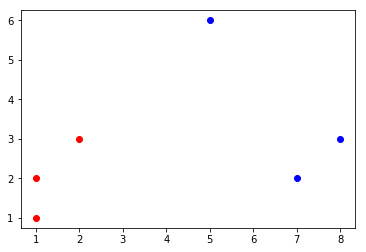

In [2]:
red_points = (list(),list())
blue_points = (list(),list())

for i in range(len(X)):
    if y[i] == -1:
        red_points[0].append(X[i][0])
        red_points[1].append(X[i][1])
    else:
        blue_points[0].append(X[i][0])
        blue_points[1].append(X[i][1])
        
plt.plot(red_points[0], red_points[1], 'ro')
plt.plot(blue_points[0], blue_points[1], 'bo')
plt.show()



## Solve Alphas

In [3]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers


#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])


In [4]:
alphas

array([[8.71440822e-12],
       [1.86368693e-11],
       [1.23456790e-01],
       [8.64197531e-02],
       [3.70370370e-02],
       [5.11081276e-11]])

## Compute w and b parameters

In [5]:
#w parameter in vectorized form
w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X[S], w)
b = np.mean(b)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b)

Alphas =  [0.12345679 0.08641975 0.03703704]
w =  [0.44444444 0.22222222]
b =  -2.5555555557919636


## Predict and Plot

In [10]:
y_pred = np.sign(X@w + b)
print(y_pred)

array([[-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [13]:
np.sign([1,2]@w + b)

array([-1.])

In [11]:
X@w + b

array([[-1.66666667],
       [-1.88888889],
       [-1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.66666667]])

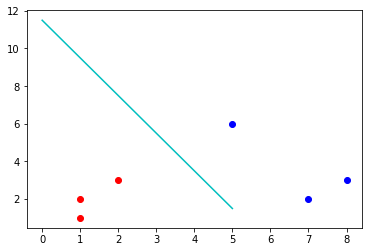

In [60]:
def get_y(x):
    return -(w[0]*x + b)*1.0/w[1]

x_points = [0,1,2,3,4,5]
y_points = [ get_y(e) for e in x_points]

plt.plot(red_points[0], red_points[1], 'ro')
plt.plot(blue_points[0], blue_points[1], 'bo')
plt.plot(x_points, y_points, 'c-')
plt.show()

# Non Linearly Separable 

In [90]:
X = np.array([[1,2],
        [1,1],
        [2,5],
        [1,4],              
        [5,6],
        [7,2],
        [8,3]])

y = np.array([-1,
     -1,
     -1,
      1,
      1,
      1,
      1])

In [15]:
type(X)

numpy.ndarray

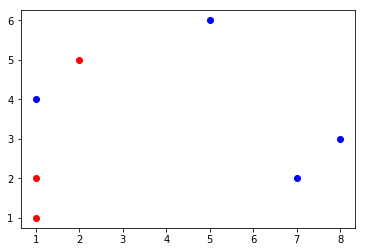

In [91]:
red_points = (list(),list())
blue_points = (list(),list())

for i in range(len(X)):
    if y[i] == -1:
        red_points[0].append(X[i][0])
        red_points[1].append(X[i][1])
    else:
        blue_points[0].append(X[i][0])
        blue_points[1].append(X[i][1])
        
plt.plot(red_points[0], red_points[1], 'ro')
plt.plot(blue_points[0], blue_points[1], 'bo')
plt.show()


# Solve Alphas

In [104]:
C = 10
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])



In [105]:
#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)
b = np.mean(b)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b)

Alphas =  [ 2.56944444 10.         10.          2.54166667  0.02777778]
w =  [0.33333333 0.16666667]
b =  -1.499999999916658


# Predict and Plot



In [106]:
y_pred = np.sign(X@w + b)
print(y_pred)

[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]]


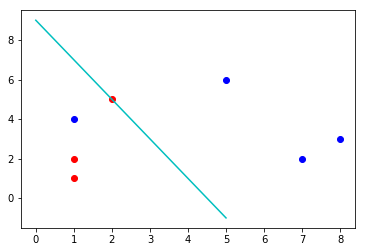

In [107]:
x_points = [0,1,2,3,4,5]
y_points = [ get_y(e) for e in x_points]

plt.plot(red_points[0], red_points[1], 'ro')
plt.plot(blue_points[0], blue_points[1], 'bo')
plt.plot(x_points, y_points, 'c-')
plt.show()